In [ ]:
# Look across all previously generated figures and tables and write at least three observations or inferences 
# that can be made from the data.
# over all the study had even control: males to females and amount of mice used for each drug regimen, with a variety of age and weight.
#The bigger the mouse the bigger the volume of tumor.  Some of the drugs made the tumors biggers while others got smaller and had on averge smaller tumors


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from scipy.stats import sem

In [2]:
#read in study data
studydata_df = pd.read_csv('Resources/Study_results.csv')
studydata_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
#read in mouse data
mousedata_df = pd.read_csv('Resources/Mouse_metadata.csv')
mousedata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
# #search for duplicates

duplicateDFRow = studydata_df[studydata_df.duplicated()]
print(duplicateDFRow)

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
137     g989          0                45.0                 0


In [5]:
#drop Mouse ID g989
restudydata_df=studydata_df[(studydata_df["Mouse ID"]!="g989")]
restudydata_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [6]:
remousedata_df=mousedata_df[(mousedata_df["Mouse ID"]!="g989")]
remousedata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [7]:
#drop duplicates
cleanstudydata_df= restudydata_df.reset_index().drop_duplicates(subset=['Mouse ID'], keep ='last').set_index('index')
cleanstudydata_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
index,,,,
1,f932,0,45.000000,0
20,x336,0,45.000000,0
53,h428,0,45.000000,0
55,v199,0,45.000000,0
109,o848,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1


In [8]:
#combining the data files
alldata_df = pd.merge(cleanstudydata_df, remousedata_df, on="Mouse ID")
alldata_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [9]:
#summary Stat Table
druggroup_df = alldata_df.groupby(['Drug Regimen'])
tumorvol_summary_df = pd.DataFrame({
    "Mean": druggroup_df["Tumor Volume (mm3)"].mean(),
    "Median": druggroup_df["Tumor Volume (mm3)"].median(),
    "Variance": druggroup_df["Tumor Volume (mm3)"].var(),
    "STD": druggroup_df["Tumor Volume (mm3)"].std(),
    "SEM": druggroup_df["Tumor Volume (mm3)"].sem(),
})
tumorvol_summary_df


,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.493884,55.591622,70.822755,8.415626,1.717832
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [10]:
drugs=alldata_df["Drug Regimen"].unique()
drugs

array(['Ketapril', 'Naftisol', 'Stelasyn', 'Zoniferol', 'Placebo',
       'Ceftamin', 'Propriva', 'Infubinol', 'Ramicane', 'Capomulin'],
      dtype=object)

In [11]:
#Generate a bar plot using both Pandas's `DataFrame.plot()` 
#and Matplotlib's `pyplot` that shows the number of total mice for each
#treatment regimen throughout the course of the study.
micecount_drug_df= alldata_df[["Drug Regimen", "Mouse ID"]]
micecount = micecount_drug_df["Drug Regimen"].value_counts()
micecount

Ramicane     25
Zoniferol    25
Naftisol     25
Ceftamin     25
Ketapril     25
Capomulin    25
Placebo      25
Infubinol    25
Stelasyn     24
Propriva     24
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Number of Mice')

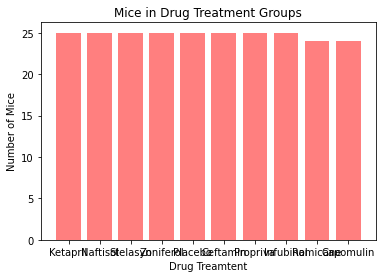

In [12]:
#matplot
# numbermice_treatment = alldata_df.plot(kind="bar", title="Total Mice for each treatment")
# numbermice_treatment.set_xlabel("Drug Treatment")
# numbermice_treatment.set_ylabel("Number of Mice")
plt.bar(drugs, micecount, color='r', alpha=0.5, align="center")
tick_locations = [value for value in drugs]
plt.xticks(tick_locations, drugs)
plt.title("Mice in Drug Treatment Groups")
plt.xlabel("Drug Treamtent")
plt.ylabel("Number of Mice")


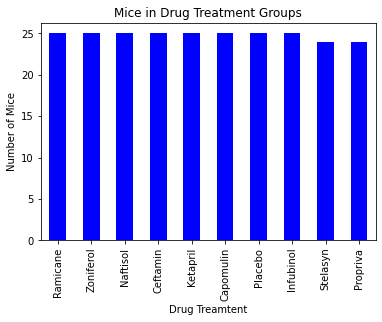

In [13]:
numbermice_treatment = micecount.plot(kind="bar", title="Total Mice for each treatment", color = "blue" )
plt.title("Mice in Drug Treatment Groups")
plt.xlabel("Drug Treamtent")
plt.ylabel("Number of Mice")
numbermice_treatment


Text(0.5, 1.0, 'Male vs Female in Study')

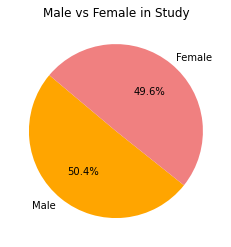

In [14]:
#PIE PLOT- Matplot
micesex= alldata_df["Sex"].value_counts()


labels= ["Male", "Female"]
colors= ["orange", "lightcoral"]
plt.pie(micesex, labels= labels, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Male vs Female in Study")

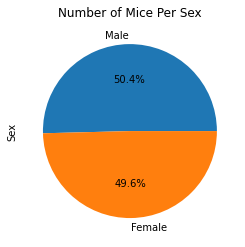

In [15]:
micesex.plot(kind="pie", autopct="%1.1f%%", title= "Number of Mice Per Sex" )

In [16]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
#Capomulin, Ramicane, Infubinol, and Ceftamin. 
#Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all 4 treatment regimens.

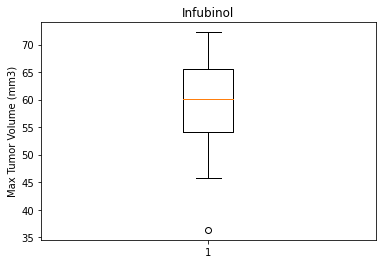

Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
Mouse ID of possible outliers for Infubinol are: [].


In [17]:
treatments1 = ['Infubinol']

for treatments1 in treatments1:
     #Create empty list to fill with tumor volume data (for plotting)
    tumor_volume1=[]
    outlier_mouse=[]
for x, row in alldata_df.iterrows():
    if row[4]==treatments1:
        tumor_volume1.append(row[2])    
volume= pd.Series(tumor_volume1) 

quartiles = volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
iqr = upperq-lowerq
lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)

fig1, ax1 = plt.subplots()
ax1.set_title(f"{treatments1}")
ax1.set_ylabel('Max Tumor Volume (mm3)')
ax1.boxplot(tumor_volume1)
plt.show()


#print outliers
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
  # Determine outliers using upper and lower bounds
if row[2]>upper_bound:
    outlier_mouse.append(row[0])
if row[2]<lower_bound:
    outlier_mouse.append(row[0])
print(f"Mouse ID of possible outliers for {treatments1} are: {outlier_mouse}.")

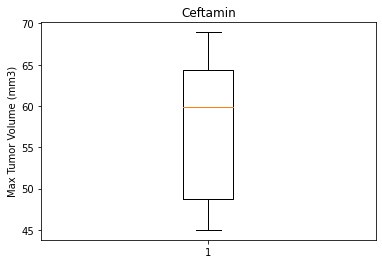

Values below 25.36 could be outliers.
Values above 87.67 could be outliers.
Mouse ID of possible outliers for Ceftamin are: [].


In [18]:
treatments2 = ['Ceftamin']
for treatments2 in treatments2:
     #Create empty list to fill with tumor vol data (for plotting)
    tumor_volume2=[]
    outlier_mouse=[]
for x,row in alldata_df.iterrows():
        if row[4]==treatments2:
            tumor_volume2.append(row[2])    
volume= pd.Series(tumor_volume2) 

quartiles = volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
iqr = upperq-lowerq
lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)
fig1, ax1 = plt.subplots()
ax1.set_title(f"{treatments2}")
ax1.set_ylabel('Max Tumor Volume (mm3)')
ax1.boxplot(tumor_volume2)
plt.show()
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
  # Determine outliers using upper and lower bounds
if row[2]>upper_bound:
    outlier_mouse.append(row[0])
if row[2]<lower_bound:
    outlier_mouse.append(row[0])
print(f"Mouse ID of possible outliers for {treatments2} are: {outlier_mouse}.")

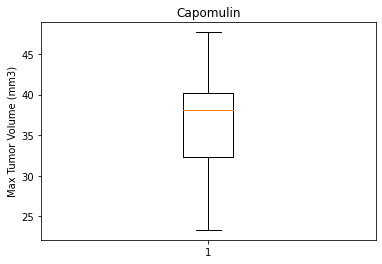

Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
Mouse ID of possible outliers for Capomulin are: ['b879'].


In [19]:
treatments3 = ['Capomulin']
for treatments3 in treatments3:
     #Create empty list to fill with tumor vol data (for plotting)
    tumor_volume3=[]
    outlier_mouse=[]
for x,row in alldata_df.iterrows():
        if row[4]==treatments3:
            tumor_volume3.append(row[2])    
volume= pd.Series(tumor_volume3) 

quartiles = volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
iqr = upperq-lowerq
lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)
fig1, ax1 = plt.subplots()
ax1.set_title(f"{treatments3}")
ax1.set_ylabel('Max Tumor Volume (mm3)')
ax1.boxplot(tumor_volume3)
plt.show()
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
  # Determine outliers using upper and lower bounds
if row[2]>upper_bound:
    outlier_mouse.append(row[0])
if row[2]<lower_bound:
    outlier_mouse.append(row[0])
print(f"Mouse ID of possible outliers for {treatments3} are: {outlier_mouse}.")

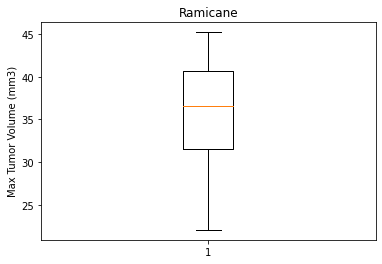

Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
Mouse ID of possible outliers for Ramicane are: ['b879'].


In [20]:
treatments4 = ['Ramicane']
for treatments4 in treatments4:
     #Create empty list to fill with tumor vol data (for plotting)
    tumor_volume4=[]
    outlier_mouse=[]
for x,row in alldata_df.iterrows():
        if row[4]==treatments4:
            tumor_volume4.append(row[2])    
volume= pd.Series(tumor_volume4) 

quartiles = volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
iqr = upperq-lowerq
lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)
fig1, ax1 = plt.subplots()
ax1.set_title(f"{treatments4}")
ax1.set_ylabel('Max Tumor Volume (mm3)')
ax1.boxplot(tumor_volume4)
plt.show()
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
  # Determine outliers using upper and lower bounds
if row[2]>upper_bound:
    outlier_mouse.append(row[0])
if row[2]<lower_bound:
    outlier_mouse.append(row[0])
print(f"Mouse ID of possible outliers for {treatments4} are: {outlier_mouse}.")

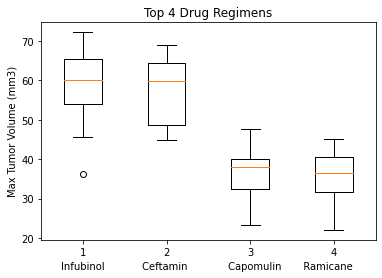

In [43]:
# fig1, ax1 = plt.subplots()
# ax1.boxplot("tumor_volume1", "tumor_volume2", "tumor_volume3", "tumor_volume4")
# plt.show()

data = [tumor_volume1, tumor_volume2, tumor_volume3, tumor_volume4]
fig1, ax1 = plt.subplots()
ax1.set_title('Top 4 Drug Regimens')
ax1.set_ylabel('Max Tumor Volume (mm3)')
#ax1.xticks([0, 1, 2, 3], ['Infubinol', 'Ceftamin', 'Capomulin', 'Ramicane']
ax1.set_xlabel('Infubinol            Ceftamin             Capomulin       Ramicane ')
ax1.boxplot(data) 
plt.show()





In [22]:
# Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse. g316
just_mouse_df= restudydata_df.loc[restudydata_df["Mouse ID"] == "g316", :]
just_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
241,g316,0,45.000000,0
410,g316,5,44.022752,0
586,g316,10,44.502042,0
807,g316,15,45.216743,0
1017,g316,20,45.933322,1
1249,g316,25,46.809225,1
1311,g316,30,44.221480,2
1558,g316,35,44.702833,2
1715,g316,40,45.565821,2
1791,g316,45,40.159220,2


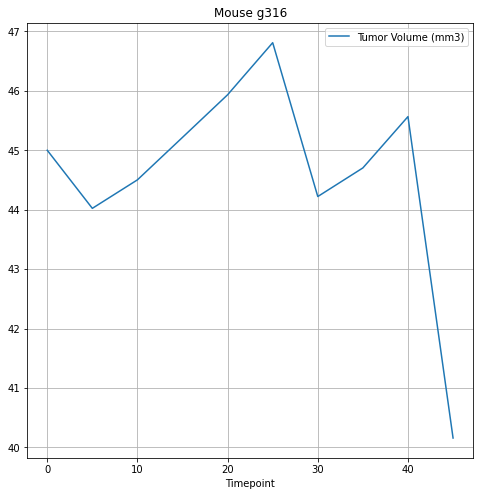

In [23]:
just_mouse_df.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Mouse g316")
plt.show()

In [24]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
just_Cap_df= alldata_df.loc[alldata_df["Drug Regimen"] == "Capomulin", :]
just_Cap_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
39,w150,10,39.952347,0,Capomulin,Male,23,23
46,r157,15,46.539206,0,Capomulin,Male,22,25
56,f966,20,30.485985,0,Capomulin,Male,16,17
98,j246,35,38.753265,1,Capomulin,Female,21,21
119,b128,45,38.982878,2,Capomulin,Female,9,22
124,t565,45,34.455298,0,Capomulin,Female,20,17
126,l509,45,41.483008,3,Capomulin,Male,17,21
132,g288,45,37.074024,1,Capomulin,Male,3,19
143,r554,45,32.377357,3,Capomulin,Female,8,17
146,g316,45,40.159220,2,Capomulin,Female,22,22


In [25]:

bigalldata_df = pd.merge(restudydata_df, remousedata_df, on="Mouse ID")
just_Cap_df= bigalldata_df.loc[bigalldata_df["Drug Regimen"] == "Capomulin", :]
just_Cap_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [26]:
tumorvol_mouse_df = just_Cap_df.groupby(['Mouse ID'])
tumorvol_mouse_df = pd.DataFrame({
    "Mean": tumorvol_mouse_df["Tumor Volume (mm3)"].mean(),
})


In [27]:
Capomulin_df = pd.merge(just_Cap_df, tumorvol_mouse_df, on="Mouse ID")

Capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Mean
0,b128,0,45.000000,0,Capomulin,Female,9,22,41.963636
1,b128,5,45.651331,0,Capomulin,Female,9,22,41.963636
2,b128,10,43.270852,0,Capomulin,Female,9,22,41.963636
3,b128,15,43.784893,0,Capomulin,Female,9,22,41.963636
4,b128,20,42.731552,0,Capomulin,Female,9,22,41.963636
...,...,...,...,...,...,...,...,...,...
225,m601,25,33.118756,1,Capomulin,Male,22,17,34.847470
226,m601,30,31.758275,1,Capomulin,Male,22,17,34.847470
227,m601,35,30.834357,1,Capomulin,Male,22,17,34.847470
228,m601,40,31.378045,1,Capomulin,Male,22,17,34.847470


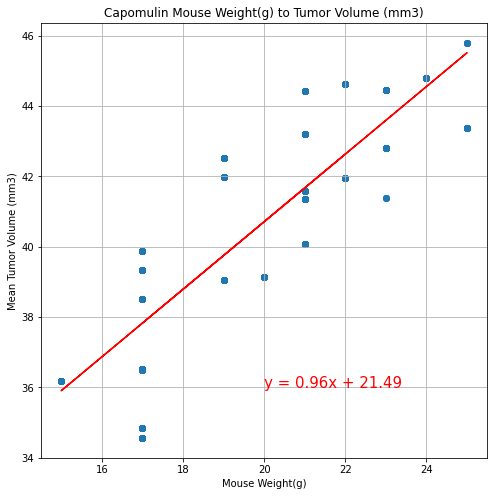

In [44]:
Capomulin_df.plot(kind="scatter", x = "Weight (g)", y = "Mean", grid=True, figsize=(8,8),
              title="Capomulin Mouse Weight(g) to Tumor Volume (mm3)")


x_values = Capomulin_df["Weight (g)"]
y_values = Capomulin_df["Mean"]
#these are created out of the linregress:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
# r- is color
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.show()

In [29]:
weight=Capomulin_df.iloc[:,7]
tumor=Capomulin_df.iloc[:,2]
correlation = st.pearsonr(weight,tumor)
print(f"The correlation coefficient between weight and tumorsize is {round(correlation[0],2)}")



The correlation coefficient between weight and tumorsize is 0.53


In [30]:
#Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. 
#Plot the linear regression model on top of the previous scatter plot.
